In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
#import fitsio
import scipy.stats #import kstest

In [89]:
def plot_entropy_raw(filename):
    plt.figure()

    data = pd.read_csv(filename)

    petals = list(np.arange(10))
    filters = ['B', 'R', 'Z']
    amps = ['A', 'B', 'C', 'D']

    entropy = np.ones([10,12])
    plt.imshow(entropy)
    for i in range(10):
        for j in range(12):
            i_par = i%2
            j_par = j%2
            spectro = i - i_par + j//6
            filt = filters[(j%6)//2]
            amp = amps[j%2 + 2*i_par]
            #print(i, j, spectro)
            spec = filt+str(spectro)
            ii = (data['SPECTRO']==spec) & (data['AMP']==amp)
            entropy[i,j] = float(data[ii]['H'])
            text = list(data[ii]['SPECTRO'])+list(data[ii]['AMP'])
            text = text[0] + text[1]
            #print(text)
            plt.text(j-0.5, i, text, color='white')

            
    title = 'EXPID {} NIGHT {} PROGRAM {}'.format(data['EXPID'][0], 
                                              data['NIGHT'][1],
                                              data['PROGRAM'][2])
    plot_name = 'plot_entropy_raw_{}_{}.png'.format(data['EXPID'][0], data['OBSTYPE'][0])
    plt.imshow(entropy, vmin=0, vmax=1)
    plt.colorbar(label='Configuration Entropy')
    plt.title(title)
    plt.savefig(plot_name)
    plt.clf()
    plt.close()

In [91]:
filenames = glob.glob('entropy_raw_*.csv')
filenames.sort()
for filename in filenames:
    #print(filename)
    plot_entropy_raw(filename)

In [19]:
data

,Unnamed: 0,SPECTRO,AMP,EXPID,NIGHT,PROGRAM,OBSTYPE,H
0,0,Z3,A,132801,20220502,CALIB ZEROs for nightly bias,ZERO,0.264170
1,1,Z3,B,132801,20220502,CALIB ZEROs for nightly bias,ZERO,0.403722
2,2,Z3,C,132801,20220502,CALIB ZEROs for nightly bias,ZERO,0.210221
3,3,Z3,D,132801,20220502,CALIB ZEROs for nightly bias,ZERO,0.151153
4,4,R3,A,132801,20220502,CALIB ZEROs for nightly bias,ZERO,0.283131
...,...,...,...,...,...,...,...,...
115,115,R9,D,132801,20220502,CALIB ZEROs for nightly bias,ZERO,0.000000
116,116,B9,A,132801,20220502,CALIB ZEROs for nightly bias,ZERO,0.333130
117,117,B9,B,132801,20220502,CALIB ZEROs for nightly bias,ZERO,0.135581
118,118,B9,C,132801,20220502,CALIB ZEROs for nightly bias,ZERO,0.102693


In [3]:
tile_entropy = []
petal_entropy = []
tile_id = []
petal_id = []
lastnight = []
filenames = glob.glob("../daily/summary_rr_entropy_daily_*.csv")
for filename in filenames:
    #filename = "summary_rr_entropy_daily_{}.csv".format(20220400+i)
    try:
        data = pd.read_csv(filename)
        petal_entropy += list(data['H'])
        tile_entropy += list(data['H_TILE'])
        tile_id += list(data['TILEID'])
        petal_id += list(data['PETALID'])
        lastnight += list(data['LASTNIGHT'])
    except:
        pass
tile_entropy = np.array(tile_entropy)
petal_entropy = np.array(petal_entropy)
tile_id = np.array(tile_id)
petal_id = np.array(petal_id)
lastnight = np.array(lastnight)

In [3]:
#data = pd.read_csv("summary_rr_entropy_daily.csv")
#tile_entropy = data["H_TILE"]
#tile_id = data["TILEID"]

5027


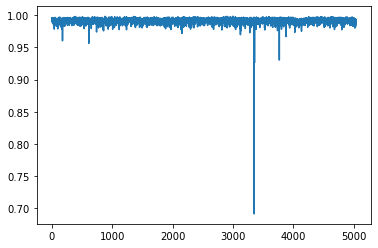

In [4]:
plt.plot(petal_entropy)
print(len(np.unique(petal_entropy)))

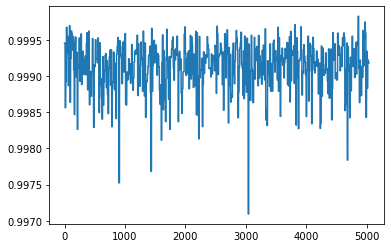

In [5]:
plt.plot(tile_entropy)

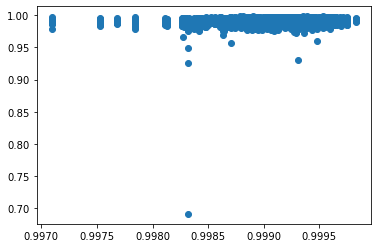

In [6]:
plt.scatter(tile_entropy, petal_entropy)

In [7]:
ll = (petal_entropy<0.980) & (tile_entropy<0.9986) #0.980 es un buen corte sobre entropy de petalos 
a = tile_id[ll]
b = petal_id[ll]
c = lastnight[ll]
d = petal_entropy[ll]
e = tile_entropy[ll]

for i in range(len(a)):
    print('{:05d} {} {} {:.3f} {:.3f}'.format(a[i], b[i], c[i], d[i], e[i]))

03371 2 20220917 0.977 0.998
03371 7 20220917 0.975 0.998
11089 4 20220924 0.979 0.998
04214 3 20221002 0.978 0.997
42587 0 20221013 0.950 0.998
42587 1 20221013 0.691 0.998
42587 3 20221013 0.977 0.998
42587 6 20221013 0.926 0.998
42587 7 20221013 0.976 0.998
11185 8 20220918 0.967 0.998
22422 0 20220913 0.978 0.998


In [8]:
ii = np.argsort(tile_entropy)
sorted_tiles = tile_id[ii]

In [9]:
for i in range(100):
    print(sorted_tiles[i], tile_entropy[ii[i]])

4214 0.9970934257329624
4214 0.9970934257329624
4214 0.9970934257329624
4214 0.9970934257329624
4214 0.9970934257329624
4214 0.9970934257329624
4214 0.9970934257329624
4214 0.9970934257329624
4214 0.9970934257329624
4214 0.9970934257329624
8134 0.997524073166644
8134 0.997524073166644
8134 0.997524073166644
8134 0.997524073166644
8134 0.997524073166644
8134 0.997524073166644
8134 0.997524073166644
8134 0.997524073166644
8134 0.997524073166644
8134 0.997524073166644
40065 0.997682414209654
40065 0.997682414209654
40065 0.997682414209654
40065 0.997682414209654
40065 0.997682414209654
40065 0.997682414209654
40065 0.997682414209654
40065 0.997682414209654
40065 0.997682414209654
40065 0.997682414209654
22422 0.9978383599842392
22422 0.9978383599842392
22422 0.9978383599842392
22422 0.9978383599842392
22422 0.9978383599842392
22422 0.9978383599842392
22422 0.9978383599842392
22422 0.9978383599842392
22422 0.9978383599842392
22422 0.9978383599842392
9237 0.9981140115733615
9237 0.998114011

In [10]:
tile_id = 4229
tile_id = 7256
#tile_id = 4408
#tile_id = 6206
tile_id = 7246
release = "daily"
release_path = "/global/cfs/cdirs/desi/spectro/redux/{}/".format(release)
search_path = "{}/tiles/cumulative/{}/*/redrock-*-{}-thru*.fits".format(release_path, tile_id, tile_id)
z_in_petal = {}
for petal_id in range(10):
    search_path = "{}/tiles/cumulative/{}/*/redrock-*-{}-thru*.fits".format(release_path, tile_id, tile_id)
    print(search_path)
    try:
        file_in = glob.glob(search_path)[0]
        this_petal_id = file_in.split('/')[-1].split('-')[-3]
        tile_file = file_in.replace("redrock-{}".format(this_petal_id), "redrock-{}".format(petal_id))
        print(tile_file)
        try:
            z_tile_per_exp = fitsio.read(tile_file, ext="REDSHIFTS")
            fmap_tile_per_exp = fitsio.read(tile_file, ext="FIBERMAP")
            exp_fmap_tile_per_exp = fitsio.read(tile_file, ext="EXP_FIBERMAP")
        except:
            pass
        try:
            ii = (z_tile_per_exp['ZWARN']==0) #& (exp_fmap_tile_per_exp['FIBERSTATUS']==0)
            n_good_z = np.count_nonzero(ii)
            #all_good_z += list(z_tile_per_exp['Z'][ii])
            z_in_petal[petal_id] = z_tile_per_exp['Z'][ii]
        except:
            pass
    except:
        pass

/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-0-7246-thru20220329.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-1-7246-thru20220329.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-2-7246-thru20220329.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-3-7246-thru20220329.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/*/redrock-*-7246-thru*.fits
/global/cfs/cdirs/desi/spectro/redux/daily//tiles/cumulative/7246/20220329/redrock-4-7246-thru2022

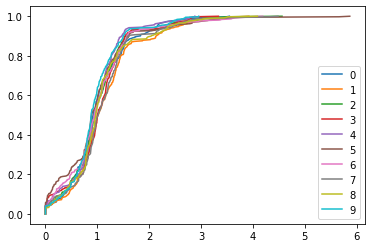

In [11]:
for i in z_in_petal.keys():
    z = z_in_petal[i]
    z = np.sort(z)
    n = len(z)
    cdf = np.linspace(0,1,n)
    plt.plot(z,cdf, label='{}'.format(i))
plt.legend()

In [12]:
p_value_results = np.ones((10,10))
for i in range(10):
    for j in range(10):
        p_value_results[i,j] = scipy.stats.kstest(z_in_petal[i],z_in_petal[j])[1]

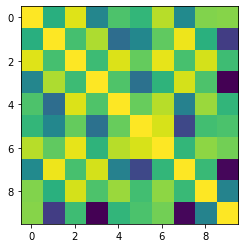

In [13]:
plt.imshow(np.log10(p_value_results))

In [14]:
print(p_value_results[p_value_results<0.001], np.min(p_value_results))

[6.94230559e-04 9.24110332e-05 8.10206001e-04 1.19558004e-05
 6.94230559e-04 8.10206001e-04 1.38542462e-04 1.38542462e-04
 1.44903938e-05 9.24110332e-05 1.19558004e-05 1.44903938e-05] 1.1955800373830705e-05


In [15]:
p_value_results[7,:]

array([2.73669786e-03, 7.50652546e-01, 3.66221868e-02, 4.89051931e-01,
       1.70972516e-03, 1.38542462e-04, 2.13220881e-02, 1.00000000e+00,
       2.63411238e-02, 1.44903938e-05])

In [17]:
sky_entropy_files = glob.glob("entropy_sky_sframe_20220420_*.csv")
print(sky_entropy_files)

['entropy_sky_sframe_20220420_00131090.csv', 'entropy_sky_sframe_20220420_00131089.csv', 'entropy_sky_sframe_20220420_00131088.csv', 'entropy_sky_sframe_20220420_00131092.csv', 'entropy_sky_sframe_20220420_00131085.csv', 'entropy_sky_sframe_20220420_00131086.csv', 'entropy_sky_sframe_20220420_00131091.csv']


In [18]:
tile_entropy = []
exp_id = []
petal_id = []
lastnight = []
tile_id = []
band = []
for filename in sky_entropy_files:
    try:
        data = pd.read_csv(filename)
        tile_entropy += list(data['H'])
        exp_id += list(data['EXPID'])
        petal_id += list(data['PETAL'])
        lastnight += list(data['NIGHT'])
        tile_id += list(data['TILEID'])
        band += list(data['BAND'])
    except:
        pass
tile_entropy = np.array(tile_entropy)
exp_id = np.array(exp_id)
petal_id = np.array(petal_id)
lastnight = np.array(lastnight)
tile_id = np.array(tile_id)
band = np.array(band)

131085


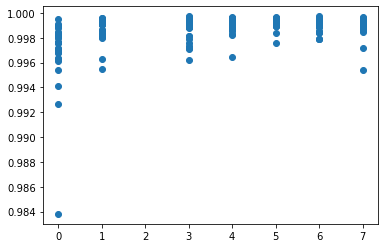

In [19]:
plt.scatter(exp_id-exp_id.min(), tile_entropy)
print(exp_id.min())

130976


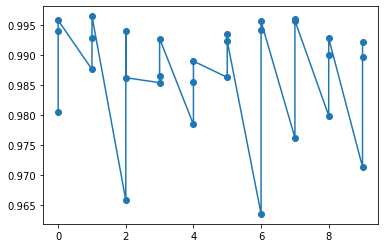

In [15]:
pec_exp_id = exp_id.min()+19
ii = exp_id==pec_exp_id
plt.plot(petal_id[ii], tile_entropy[ii])
plt.scatter(petal_id[ii], tile_entropy[ii])
print(pec_exp_id)

In [16]:
ii = tile_entropy < 0.950
print(len(ii), len(tile_id), len(exp_id))
tmp_tile = tile_id[ii]
tmp_exp = exp_id[ii]

bad_tile = []
bad_exp = []
for i in range(len(tmp_tile)):
    if (tmp_tile[i] not in bad_tile) and (tmp_exp[i] not in bad_exp):
        bad_tile.append(tmp_tile[i])
        bad_exp.append(tmp_exp[i])
        
bad_exp = np.array(bad_exp)
bad_tile = np.array(bad_tile)

ii = np.argsort(bad_exp)
bad_exp = bad_exp[ii]
bad_tile = bad_tile[ii]

print('EXPID  TILEID')
for e,t in zip(bad_exp, bad_tile):
    ii = exp_id == e
    h = np.mean(tile_entropy[ii])
    if h < 0.95:
        print(e,t)

960 960 960
EXPID  TILEID


In [155]:
bad_exp

array([], dtype=float64)